<a href="https://colab.research.google.com/github/Hiranmai-T/DNN1/blob/master/1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)
(60000,)
(10000, 28, 28)
9


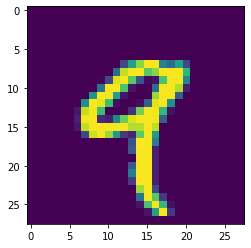

In [17]:
print (X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train[4])
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])


In [40]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(X_train.shape)

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [19]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [70]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64,3))
model.add(Convolution2D(128,3))
model.add(MaxPooling2D(2))
model.add(Convolution2D(64, 1, activation='relu'))
model.add(Convolution2D(128,3))
model.add(MaxPooling2D(2))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(64,3))
model.add(MaxPooling2D(2))
model.add(Convolution2D(10, 1, activation='relu'))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [71]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_71 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 11, 11, 64)        8256      
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [73]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 42s 701us/step - loss: 0.3364 - acc: 0.8805
Epoch 2/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0559 - acc: 0.9831
Epoch 3/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0410 - acc: 0.9877
Epoch 4/10
60000/60000 [==============================] - 41s 684us/step - loss: 0.0352 - acc: 0.9893
Epoch 5/10
60000/60000 [==============================] - 41s 678us/step - loss: 0.0295 - acc: 0.9911
Epoch 6/10
60000/60000 [==============================] - 41s 677us/step - loss: 0.0254 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 40s 675us/step - loss: 0.0237 - acc: 0.9926
Epoch 8/10
60000/60000 [==============================] - 41s 679us/step - loss: 0.0216 - acc: 0.9933
Epoch 9/10
60000/60000 [==============================] - 40s 670us/step - loss: 0.0198 - acc: 0.9940
Epoch 10/10
60000/60000 [==============================] - 40s 673us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [75]:
print(score)

[0.036883784625188126, 0.9909]


In [0]:
y_pred = model.predict(X_test)

In [77]:
print(y_pred[:9])
print(y_test[:9])

[[6.4993626e-15 3.5827263e-13 4.1456816e-12 8.5831687e-15 6.4993626e-15
  6.4993626e-15 6.4993626e-15 1.0000000e+00 6.4993626e-15 3.4929608e-11]
 [2.7876448e-13 1.2711289e-13 1.0000000e+00 9.1845097e-14 9.1845097e-14
  9.1845097e-14 2.9079093e-11 9.1845097e-14 2.2728628e-13 9.1845097e-14]
 [7.2398426e-10 9.9999988e-01 7.2398426e-10 7.2398426e-10 1.2443956e-09
  7.2398426e-10 7.2398426e-10 9.9908881e-08 7.2398426e-10 7.2398426e-10]
 [1.0000000e+00 5.2857999e-11 4.2787573e-08 5.2857999e-11 5.2857999e-11
  5.2857999e-11 4.5727471e-09 5.2857999e-11 5.2857999e-11 9.8450741e-09]
 [3.4396142e-11 3.4396142e-11 3.4396142e-11 3.4396142e-11 9.9989319e-01
  3.4396142e-11 4.3838374e-11 3.4396142e-11 3.4596576e-10 1.0675473e-04]
 [4.3722495e-10 1.0000000e+00 4.3722495e-10 4.3722495e-10 1.1949514e-09
  4.3722495e-10 4.3722495e-10 2.3744930e-08 4.3722495e-10 4.3722495e-10]
 [1.5952094e-11 1.5952094e-11 1.5952094e-11 1.5952094e-11 9.9999630e-01
  1.5952094e-11 1.5952094e-11 7.2694735e-09 1.6075843e-09 

In [81]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
for key in layer_dict.keys():
  print(key)

conv2d_71
conv2d_72
conv2d_73
max_pooling2d_19
conv2d_74
conv2d_75
max_pooling2d_20
conv2d_76
conv2d_77
max_pooling2d_21
conv2d_78
flatten_14
activation_14


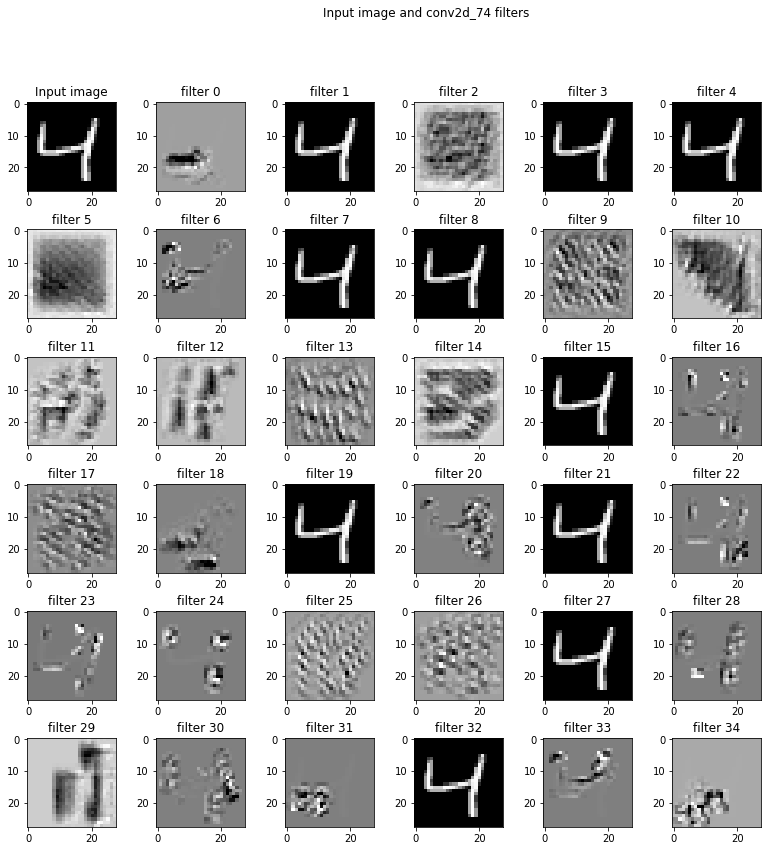

In [82]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_74'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()